1. Preparing dataset

In [0]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib


Get the url of images

In [0]:
tree_url = requests.get("http://image-net.org/api/text/imagenet.synset.geturls?wnid=n13104059")
soup_tree = BeautifulSoup(tree_url.content, 'html.parser')

carnivore_url = requests.get("http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02075296")
soup_carnivore = BeautifulSoup(carnivore_url.content, 'html.parser')

musical_url = requests.get("http://image-net.org/api/text/imagenet.synset.geturls?wnid=n03800933")
soup_musical = BeautifulSoup(musical_url.content, 'html.parser')

In [0]:
tree_str_soup=str(soup_tree)
type(tree_str_soup)
tree_split_urls = tree_str_soup.split('\r\n')
print(len(tree_split_urls))

carnivore_str_soup=str(soup_carnivore)
type(carnivore_str_soup)
carnivore_split_urls = carnivore_str_soup.split('\r\n')
print(len(carnivore_split_urls))

musical_str_soup=str(soup_musical)
type(musical_str_soup)
musical_split_urls = musical_str_soup.split('\r\n')
print(len(musical_split_urls))

1182
1617
2046


In [0]:
!mkdir /content/drive/My\ Drive/train #create the Train folder
!mkdir /content/drive/My\ Drive/train/tree #create the tree folder
!mkdir /content/drive/My\ Drive/train/carnivore #create the carnivore folder
!mkdir /content/drive/My\ Drive/train/musical #create the musical instrument folder
!mkdir /content/drive/My\ Drive/test # create the test folders
!mkdir /content/drive/My\ Drive/test/tree 
!mkdir /content/drive/My\ Drive/test/carnivore 
!mkdir /content/drive/My\ Drive/test/musical

In [0]:

def url_to_image(url):
  
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return image

n_of_training_images = 800

for progress in range(n_of_training_images):
    if(progress%20==0):
        print(progress)
    if not tree_split_urls[progress] == None:
      try:
        I = url_to_image(tree_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/drive/My Drive/train/tree/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None
#do the same for carnivore:
for progress in range(n_of_training_images):
    if(progress%20==0):
        print(progress)
    if not carnivore_split_urls[progress] == None:
      try:
        I = url_to_image(carnivore_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/drive/My Drive/train/carnivore/img'+str(progress)+'.jpg'#create a name for each image
          cv2.imwrite(save_path,I)
      except:
        None
        
#do the same for musical instruments:
for progress in range(n_of_training_images):
    if(progress%20==0):
        print(progress)
    if not musical_split_urls[progress] == None:
      try:
        I = url_to_image(musical_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/drive/My Drive/train/musical/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None
        
        
#Test data:
for progress in range(200):

    if(progress%20==0):
        print(progress)
    if not tree_split_urls[progress] == None:
      try:
        I = url_to_image(tree_split_urls[n_of_training_images+progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/drive/My Drive/test/tree/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
      except:
        None

#do the same for carnivore:
for progress in range(200):

    if(progress%20==0):
        print(progress)
    if not carnivore_split_urls[progress] == None:
      try:
        I = url_to_image(carnivore_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/drive/My Drive/test/carnivore/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
      except:
        None

#do the same for musical instruments:
for progress in range(200):
  
    if(progress%20==0):
        print(progress)
    if not musical_split_urls[progress] == None:
      try:
        I = url_to_image(musical_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/drive/My Drive/test/musical/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)
      except:
        None
        

In [0]:
! ls "/content/drive/My Drive/train/musical" | wc -l 
! ls "/content/drive/My Drive/train/tree" | wc -l 
! ls "/content/drive/My Drive/train/carnivore" | wc -l 


293
275
507


2. Extract  train set features with VGG16 and save them

In [4]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import os
import pandas as pd


train_features = []
train_labels = []

model = VGG16(weights='imagenet', include_top=False)

img_path1 = '/content/drive/My Drive/train/tree/' #path to tree images
img_path2 = '/content/drive/My Drive/train/carnivore/' #path to carnivore images
img_path3 = '/content/drive/My Drive/train/musical/' #path to musical instruments images

# store features in a csv file with labels

for filename in os.listdir(img_path1):

  img = image.load_img(img_path1 + str(filename), target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x) # get the feature vector of each picture

  train_features.append(features)
  train_labels.append('1')    # tree label  
        
for filename in os.listdir(img_path2):

  img = image.load_img(img_path2 + str(filename), target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)

  train_features.append(features)
  train_labels.append('2') # carnivore label

for filename in os.listdir(img_path3):

  img = image.load_img(img_path3 + str(filename), target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)

  train_features.append(features)
  train_labels.append('3')  # musical instrument label 

# convert data to a pandas dataframe
Dataset = list(zip(train_features, train_labels))

df = pd.DataFrame(data=Dataset, columns=['feature', 'label'])
df.to_csv('/content/drive/My Drive/train_features.csv', index=False, header=True)


Using TensorFlow backend.






58892288/58889256 [==============================] - 2s 0us/step








Extract  test set features with VGG16 and save them

In [0]:

test_features = []
test_labels = []

model = VGG16(weights='imagenet', include_top=False)

img_path1 = '/content/drive/My Drive/test/tree/'
img_path2 = '/content/drive/My Drive/test/carnivore/'
img_path3 = '/content/drive/My Drive/test/musical/'

for filename in os.listdir(img_path1):

  img = image.load_img(img_path1 + str(filename), target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)

  test_features.append(features)
  test_labels.append('1')      
        
for filename in os.listdir(img_path2):

  img = image.load_img(img_path2 + str(filename), target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model.predict(x)

  test_features.append(features)
  test_labels.append('2') 

for filename in os.listdir(img_path3):

  img = image.load_img(img_path3 + str(filename), target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)

  test_features.append(features)
  test_labels.append('3')   


Dataset = list(zip(test_features, test_labels))

df = pd.DataFrame(data=Dataset, columns=['feature', 'label'])
df.to_csv('/content/drive/My Drive/test_features.csv', index=False, header=True)

3. Logistic Regression on data

In [0]:
from keras import models
from keras import layers
from keras import optimizers
import keras


# Prepare Data
x_train = np.array(train_features) 
y_train = np.array(train_labels)  
y_train = keras.utils.to_categorical(y_train)
x_val = np.array(test_features)   
y_val = np.array(test_labels)    
y_val = keras.utils.to_categorical(y_val)

print(len(x_train), len(train_labels))


model = Sequential() 

batch_size = 32
nb_epoch = 100

model = models.Sequential()
model.add(layers.Flatten(input_shape=(1,7,7,512)))
model.add(layers.Dense(256, activation='relu', input_dim=(1*7*7*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

1075 1075
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 1028      
Total params: 6,423,812
Trainable params: 6,423,812
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])
              
# Train model
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=batch_size,
                    validation_data=(x_val, y_val))

Train on 1075 samples, validate on 287 samples
Epoch 1/50
1075/1075 [==============================] - 4s 4ms/step - loss: 0.1640 - acc: 0.9898 - val_loss: 0.2330 - val_acc: 0.9826
Epoch 2/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.1642 - acc: 0.9898 - val_loss: 0.1676 - val_acc: 0.9895
Epoch 3/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.1417 - acc: 0.9912 - val_loss: 0.1676 - val_acc: 0.9895
Epoch 4/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.2063 - acc: 0.9870 - val_loss: 0.3627 - val_acc: 0.9774
Epoch 5/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.2311 - acc: 0.9856 - val_loss: 0.2793 - val_acc: 0.9826
Epoch 6/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.2460 - acc: 0.9847 - val_loss: 0.2793 - val_acc: 0.9826
Epoch 7/50
1075/1075 [==============================] - 3s 3ms/step - loss: 0.2013 - acc: 0.9874 - val_loss: 0.2793 - val_acc: 0.9826
Epoch 8/50
1075

Get the model accuracy on test set

In [0]:
score = model.evaluate(x_val, y_val, verbose=0) 
print('Test accuracy:', score[1])

Test accuracy: 0.9947735191637631


Concat all data for reducing features

In [6]:
import itertools

all_features = list(itertools.chain(train_features, test_features)) 
all_labels = list(itertools.chain(train_labels, test_labels))

print(len(all_features))
print(len(all_labels))

1362
1362


In [0]:
# save all features with labels in a pandas dataframe
Dataset = list(zip(all_features, all_labels))

df = pd.DataFrame(data=Dataset, columns=['feature', 'label'])
df.to_csv('/content/drive/My Drive/all_features.csv', index=False, header=True)

4. Reduce feature with PCA 2D

In [0]:
from sklearn.decomposition import PCA

# load dataset from Pandas DataFrame
df = pd.read_csv('/content/drive/My Drive/all_features.csv', names=['feature','label'])

# Reshaping the features
all_features = np.asarray(all_features)
x = all_features.reshape(len(all_features), 25088)

# PCA transform
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
# put reduced features in a pandas dataframe
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
df.to_csv('/content/drive/My Drive/all_features_2dpca.csv', index=False, header=True)



Visualize 2D Projection

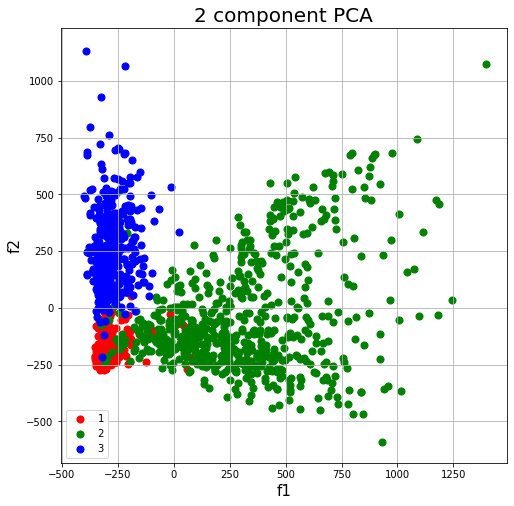

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('f1', fontsize = 15)
ax.set_ylabel('f2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['1', '2', '3']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

3D PCA

In [0]:
pca = PCA(n_components=3)
principalComponents3 = pca.fit_transform(x)
principalDf3 = pd.DataFrame(data = principalComponents3
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

# put reduced features in a pandas dataframe
finalDf3 = pd.concat([principalDf3, df[['label']]], axis = 1)
df.to_csv('/content/drive/My Drive/all_features_3dpca.csv', index=False, header=True)


Visualize 3D projection

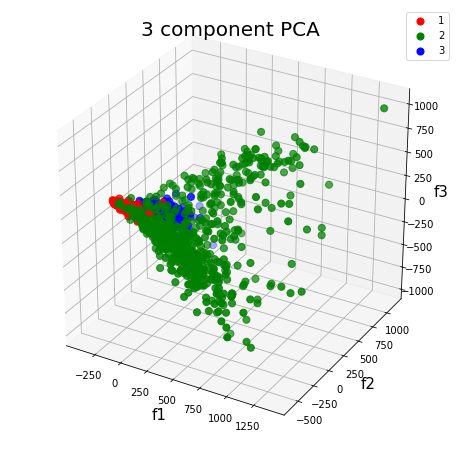

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig3 = plt.figure(figsize = (8,8))
ax3 = fig3.add_subplot(111, projection='3d') 
ax3.set_xlabel('f1', fontsize = 15)
ax3.set_ylabel('f2', fontsize = 15)
ax3.set_zlabel('f3', fontsize = 15)
ax3.set_title('3 component PCA', fontsize = 20)
targets = ['1', '2', '3']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax3.scatter(finalDf3.loc[indicesToKeep, 'principal component 1']
               , finalDf3.loc[indicesToKeep, 'principal component 2']
               , finalDf3.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax3.legend(targets)
ax3.grid()

4. Reducing fetures with T-SNE 2D

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_2d_results = tsne.fit_transform(x)

tsne2d = pd.DataFrame(data = tsne_2d_results
             , columns = ['principal component 1', 'principal component 2'])

# put reduced features in a pandas dataframe
finaltsne2d = pd.concat([tsne2d, df[['label']]], axis = 1)
df.to_csv('/content/drive/My Drive/all_features_2dtsne.csv', index=False, header=True)



Visualize T-SNE 2D

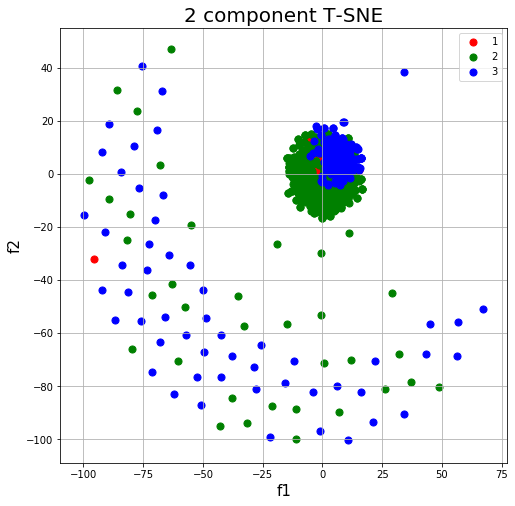

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('f1', fontsize = 15)
ax.set_ylabel('f2', fontsize = 15)
ax.set_title('2 component T-SNE', fontsize = 20)
targets = ['1', '2', '3']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaltsne2d['label'] == target
    ax.scatter(finaltsne2d.loc[indicesToKeep, 'principal component 1']
               , finaltsne2d.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
tsne3d = TSNE(n_components=3)
tsne_3d_results = tsne3d.fit_transform(x)

tsne3d = pd.DataFrame(data = tsne_3d_results
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finaltsne3d = pd.concat([tsne3d, df[['label']]], axis = 1)
df.to_csv('/content/drive/My Drive/all_features_3dtsne.csv', index=False, header=True)


visualizing 3D t-sne

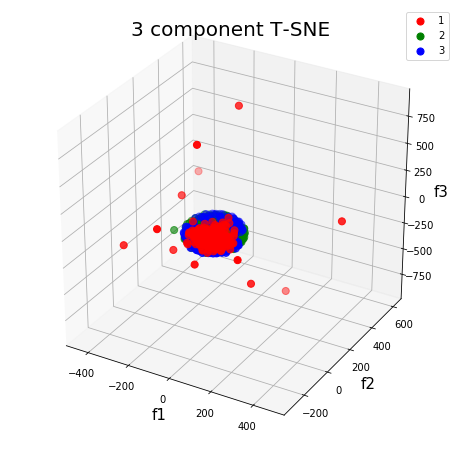

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('f1', fontsize = 15)
ax.set_ylabel('f2', fontsize = 15)
ax.set_zlabel('f3', fontsize = 15)
ax.set_title('3 component T-SNE', fontsize = 20)
targets = ['1', '2', '3']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaltsne3d['label'] == target
    ax.scatter(finaltsne3d.loc[indicesToKeep, 'principal component 1']
               , finaltsne3d.loc[indicesToKeep, 'principal component 2']
               , finaltsne3d.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

5. SVM for classifying on 2D pca vectors

In [27]:
# importing necessary libraries 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(tsne_2d_results, all_labels, test_size=0.20, random_state=111)

# training a linear SVM classifier 

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)
 


0.3882783882783883


SVM with 3d pca

In [25]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents3, all_labels, test_size=0.20, random_state=111)

# training a linear SVM classifier 
 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)


0.978021978021978


SVM 2D t-sne

In [33]:

X_train, X_test, y_train, y_test = train_test_split(tsne_2d_results, all_labels, test_size=0.20, random_state=111)

# training a linear SVM classifier 
 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)


0.39194139194139194


SVM 3d t-sne

In [28]:

X_train, X_test, y_train, y_test = train_test_split(tsne_3d_results, all_labels, test_size=0.20, random_state=111)

# training a linear SVM classifier 
 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)

0.6813186813186813
